Generating the plot for Average Scores for LLM and RAG Answers :

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
llm_rag_qa_accuracy_stats_file_path = '../data/output/evaluation/llm_rag_qa_accuracy_stats.json'

# Read JSON file
with open(llm_rag_qa_accuracy_stats_file_path, 'r') as f:
    llm_rag_qa_accuracy_stats = json.load(f)

In [3]:
len(llm_rag_qa_accuracy_stats) # 80 samples

80

In [4]:
def plot_combined_scores(data):
    """
    Calculate and plot combined average scores for LLM and RAG Answer Scores with compact visuals.
    
    Parameters:
        data (list): List containing the results with llm_answer_scores and rag_answer_scores.
    """
    metrics = ['Accuracy', 'Completeness', 'Clarity', 'Conciseness']
    llm_scores = []
    rag_scores = []

    for row in data:
        llm_scores.append([row.get('llm_answer_scores', {}).get(metric, 0) for metric in metrics])
        rag_scores.append([row.get('rag_answer_scores', {}).get(metric, 0) for metric in metrics])
    
    # Convert to DataFrames
    llm_scores_df = pd.DataFrame(llm_scores, columns=metrics)
    rag_scores_df = pd.DataFrame(rag_scores, columns=metrics)
    
    # Calculate average scores
    llm_average_scores = llm_scores_df.mean()
    rag_average_scores = rag_scores_df.mean()

    # Combine data into a single DataFrame for plotting
    combined_data = pd.DataFrame({
        'Metric': metrics * 2,
        'Score': list(llm_average_scores) + list(rag_average_scores),
        'Source': ['LLM'] * len(metrics) + ['RAG'] * len(metrics)
    })
    
    # Create a grouped bar plot
    plt.figure(figsize=(8, 5))  # Adjusted figure size for compactness
    sns.barplot(x='Metric', y='Score', hue='Source', data=combined_data, palette='coolwarm', edgecolor='black')
    
    # Customize the plot
    plt.title("Average Scores for LLM and RAG Answers", fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel("Metrics", fontsize=14, fontweight='bold')
    plt.ylabel("Average Score", fontsize=14, fontweight='bold')
    plt.ylim(0, 10)  # Scores range from 0 to 10

    # Annotate each bar with its value
    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.2, 
                 f'{p.get_height():.2f}', ha='center', va='center', fontsize=10, fontweight='bold')
    
    plt.legend(title="Source", loc="upper right", fontsize=12)
    plt.tight_layout()
    plt.show()

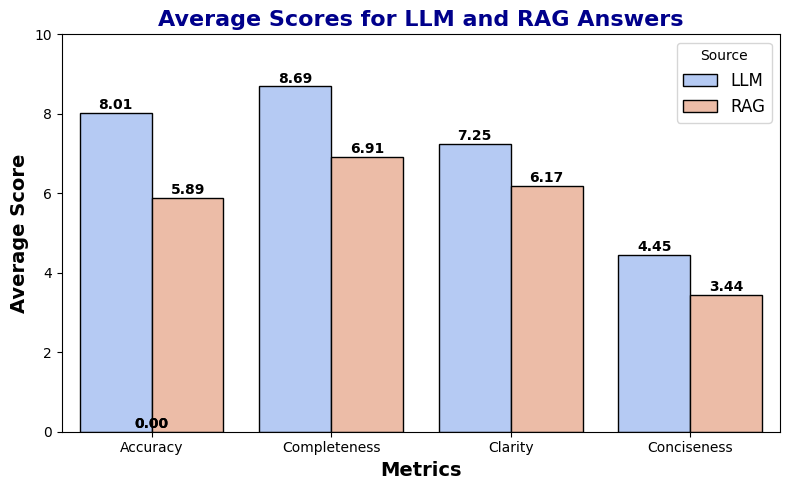

In [5]:
plot_combined_scores(llm_rag_qa_accuracy_stats)

The RAG pipeline does better than regular LLMs on the metrics of accuracy and completeness given that it is able to augment its context with very relevant content fetched based on the question asked. It however suffers in conciseness but we posit that that is easy to improve on if the prompt specifies fewer elaborate explanations and maybe a token limit for the answers generated.

Generating a Plot for Average Scores for RAG Generated Questions

In [6]:
questions_generated_stats_file_path = '../data/output/evaluation/questions_generated_stats.json'

with open(questions_generated_stats_file_path, 'r') as f:
    questions_generated_stats = json.load(f)

In [7]:
len(questions_generated_stats)

190

In [8]:
def plot_average_scores(data):
    """
    Calculate and plot average scores for Relevance, Clarity, Difficulty, and Coverage.
    
    Parameters:
        data (list): List of dictionaries containing question scores.
    """
    # Metrics to calculate
    metrics = ['Relevance', 'Clarity', 'Difficulty', 'Coverage']

    # Initialize a dictionary to store total scores and count
    total_scores = {metric: 0 for metric in metrics}
    count = len(data)

    # Accumulate scores for each metric
    for row in data:
        question_scores = row.get('question_scores', {})
        for metric in metrics:
            total_scores[metric] += question_scores.get(metric, 0)

    # Calculating the average for each metric
    average_scores = {metric: total / count for metric, total in total_scores.items()}
    
   
    labels = list(average_scores.keys())
    values = list(average_scores.values())
    
    # Plot horizontal bar graph
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue', edgecolor='black')
    plt.title('Average Scores for RAG Generated Questions', fontsize=16, fontweight='bold')
    plt.xlabel('Average Score', fontsize=14, fontweight='bold')
    plt.ylabel('Metrics', fontsize=14, fontweight='bold')
    plt.xlim(0, 10)  # Scores range from 0 to 10

    # Annotate each bar with its value
    for i, v in enumerate(values):
        plt.text(v + 0.1, i, f'{v:.2f}', va='center', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()


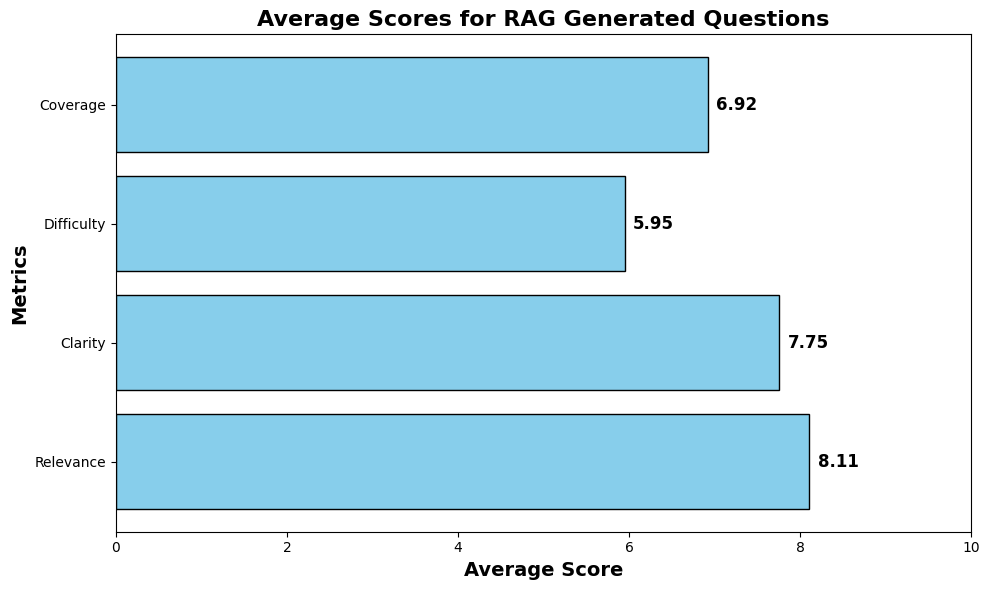

In [9]:
plot_average_scores(questions_generated_stats)

We find that the questions generated by the RAG pipeline perform fairly well on all metrics. We particularly focus on relevance and the high score there suggests effective retrieval of course content based on the topic specified.

However, it would be a more sensible comparison if we asked an LLM (without any contextual knowledge) to similarly generate questions and then have the LLM judge evaluate both our pipeline's questions and that to compare.